# Part 1

**Explore temporal patterns in SF crime data, with a focus on 10 key crime categories.**

In this part, we first calculate overall crime trends—identifying the years with the highest and lowest crime counts and plotting the total crimes per year. Then, we drill down into the evolution of the so-called focus crimes (i.e., WEAPON LAWS, PROSTITUTION, ROBBERY, BURGLARY, ASSAULT, DRUG/NARCOTIC, LARCENY/THEFT, VANDALISM, VEHICLE THEFT, STOLEN PROPERTY) by creating individual bar charts for each crime type, showing how their occurrence changes year by year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import calplot
from folium.plugins import HeatMapWithTime
import json
import urllib.request
import matplotlib as mpl
import calendar
from folium import plugins


In [2]:
# Import data 
df = pd.read_csv('merged_data.csv')
df.columns

Index(['Category', 'PdDistrict', 'X', 'Y', 'Date', 'Time', 'TimeOfDay',
       'DayOfWeek', 'DayOfMonth', 'Month', 'Year'],
      dtype='object')

In [3]:
df['Year'].sort_values().unique()  # Check the years in the dataset

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025])

In [4]:
# Count the crimes per year and identify extremes.
year_counts = df['Year'].value_counts().sort_index()
most_crimes_year = year_counts.idxmax()    # Year with maximum crime count
fewest_crimes_year = year_counts.idxmin()    # Year with minimum crime count

print("Year with the most crimes:", most_crimes_year)
print("Year with the fewest crimes:", fewest_crimes_year)

Year with the most crimes: 2018
Year with the fewest crimes: 2025


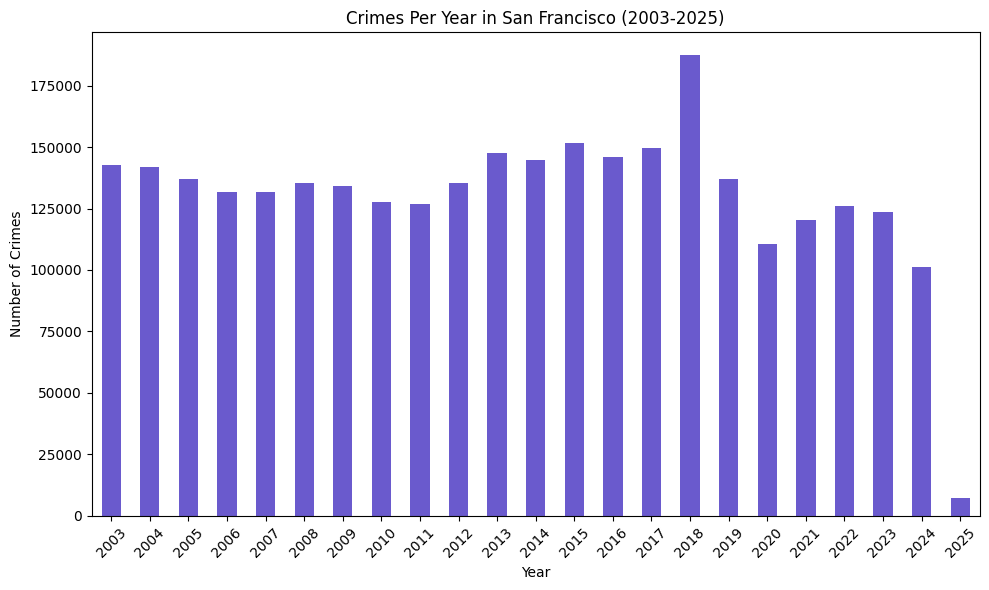

In [5]:
# --- Overall Bar Plot for Crimes Per Year ---
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='slateblue')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Crimes Per Year in San Francisco (2003-2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
df['Category'].unique()  # Check the categories in the dataset

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'LIQUOR LAWS', 'VANDALISM', 'WEAPON LAWS',
       'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

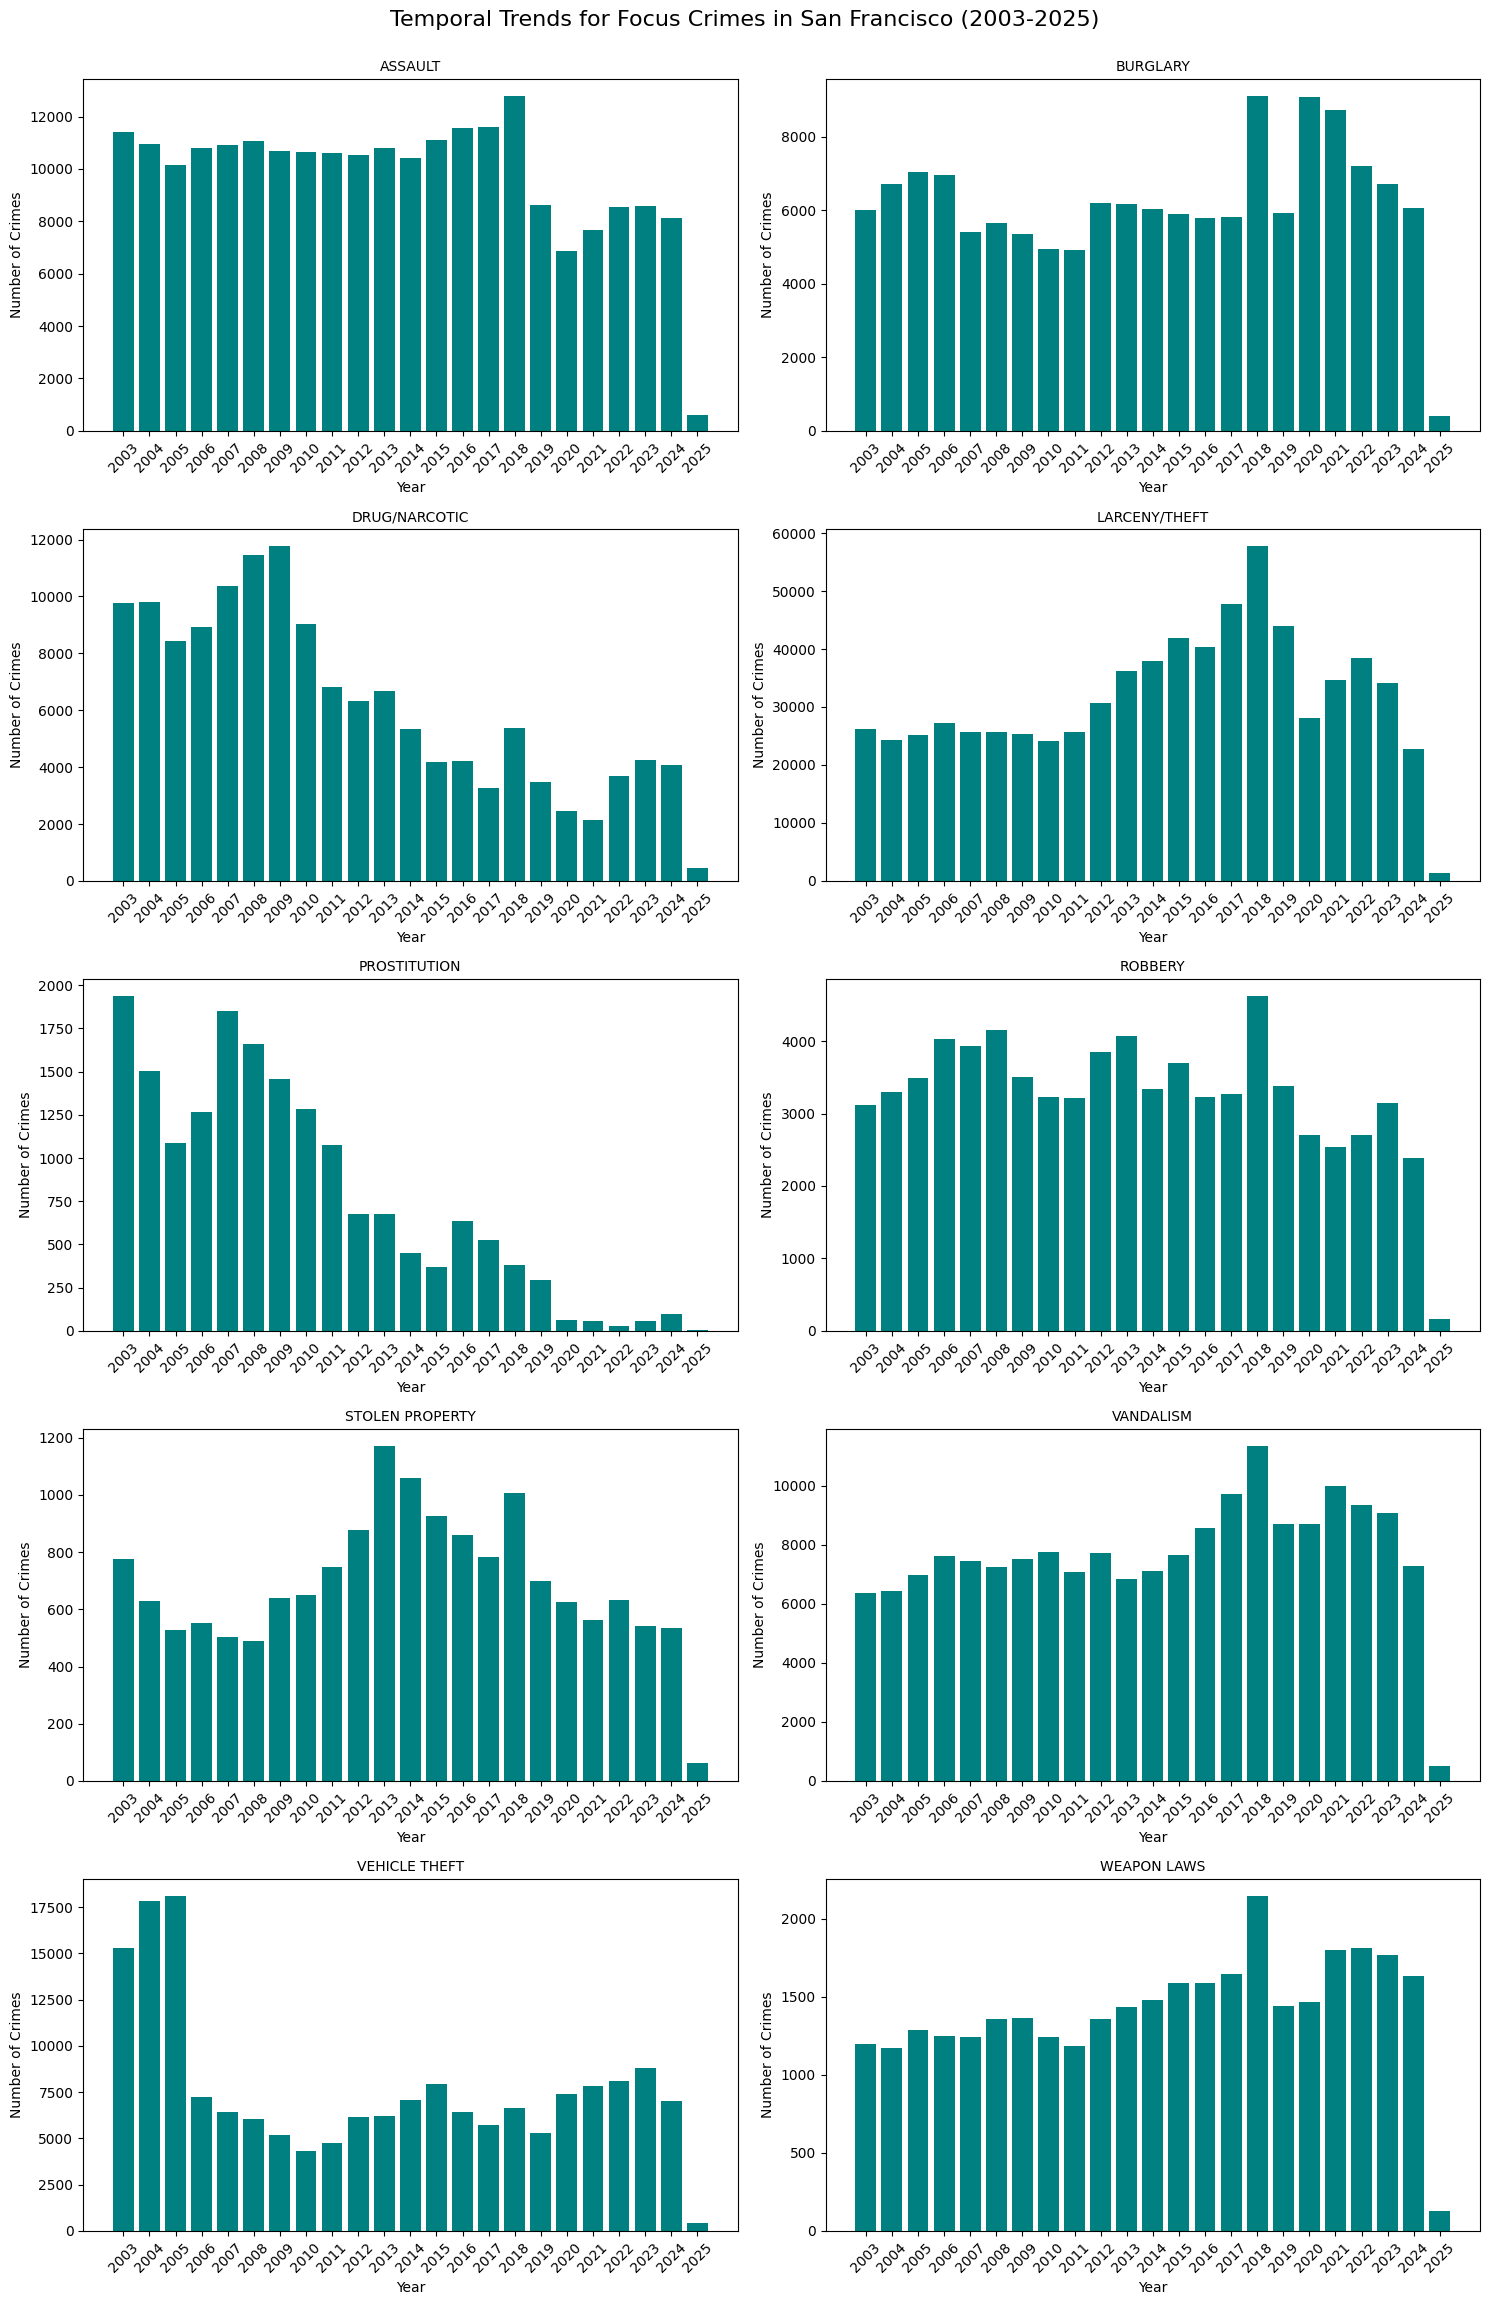

In [7]:
# --- Focus Crimes Analysis ---
focuscrimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT',
    'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'
])

# Create a subplot grid: 5 rows x 2 columns for the 10 focus crimes.
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()

sorted_focus = sorted(focuscrimes)

for i, crime in enumerate(sorted_focus):
    # Filter dataset for the current focus crime.
    crime_df = df[df['Category'] == crime]
    # Count crimes per year for this category.
    crime_year_counts = crime_df['Year'].value_counts().sort_index()
    
    # Plotting the year-by-year development for this focus crime.
    axes[i].bar(crime_year_counts.index.astype(str), crime_year_counts.values, color='teal')
    axes[i].set_title(f"{crime}", fontsize=10)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of Crimes")
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Temporal Trends for Focus Crimes in San Francisco (2003-2025)", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Crime Trends Analysis

This notebook analyzes three key trends observed in crime data over 2003-2025. The trends highlight how technological advances, policy changes, and societal shifts can influence criminal behavior.

---

### 1. Significant Decline in Vehicle Theft

- **Observation:** A steep decline in vehicle theft starting from 2005.
- **Explanation:** This decline aligns with the introduction of engine immobilizer systems. These systems make vehicles more difficult to steal by requiring the proper key. As older cars without this technology are phased out, the number of easy targets for thieves diminishes.
- **Impact:** Demonstrates how advances in automotive technology can reduce crime rates.

---

### 2. Changing Landscape of Drug/Narcotic Offenses

- **Observation:** A noticeable drop in drug/narcotic offenses, particularly beginning in the early 2010s.
- **Explanation:** This trend may result from several factors:
  - Shifts in law enforcement priorities.
  - Policy changes, such as reduced sentencing for certain drug offenses.
  - Broader societal changes in patterns of drug use.
- **Impact:** Reflects how evolving legislation, policing strategies, and public attitudes can reshape crime statistics.

---

### 3. Property-Related Crimes

- **Observation:** Categories like burglary, larceny/theft, and stolen property exhibit distinct patterns.
- **Details:**
  - **Burglary:** Generally shows a gradual decline, potentially due to improved home security measures and targeted policing.
  - **Larceny/Theft:** Its trend increases over time.
  - **Stolen Property:** From 2013 there has been a significant drop.
- **Impact:** Highlights that property crimes are influenced by economic conditions, policing strategies, and shifts in consumer habits (for example, the impact of online shopping versus in-store theft).

---

# PART 2 

missing

# Part 3

**Alternative ways to display temporal Visualizations of San Francisco Crime Data**

In this part, we explore three different ways to drill into on burglary-related crimes in 2022 and to temporal patterns in the San Francisco crime dataset:
- **Calendar Plot:** daily variations.
- **Time Series Plot:** Provides an overall trend and highlights changes over time with smoothing.

These multi-faceted visualizations help uncover underlying temporal trends that may be useful for further analyses in predictive policing.

#### Part A: Calendar Heatmaps

Calendar Plots: A calendar heatmap shows how burglary crimes are distributed throughout the days of the year, similar to GitHub’s contributions chart.

In [8]:
# Choose a subset of the data: focus on burglary crimes in 2022.
df['Date'] = pd.to_datetime(df['Date'])
crime_of_interest = 'BURGLARY'
year_of_interest = 2022
df_subset = df[(df['Category'].str.upper() == crime_of_interest) & (df['Year'] == year_of_interest)]

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2022'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


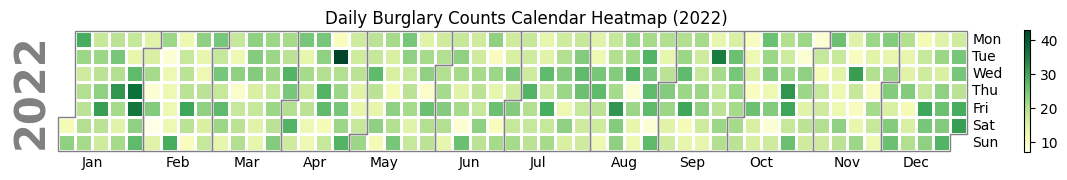

In [9]:
daily_counts = df_subset.set_index('Date').resample('D').size()

# Option 1: Calendar heatmap for all complete years (here, 2022 only)
calplot.calplot(daily_counts, cmap='YlGn', colorbar=True,
                suptitle='Daily Burglary Counts Calendar Heatmap (2022)')

Text(0.5, 0.62, 'Burglary Calendar Heatmap for 2022')

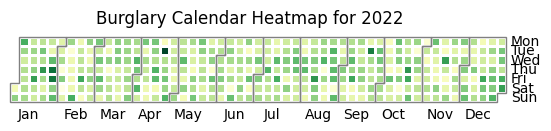

In [10]:
# Option 2: Alternatively,  a yearplot for 2022 only.
calplot.yearplot(daily_counts[daily_counts.index.year == year_of_interest], 
                 year=year_of_interest, cmap='YlGn')
plt.suptitle(f'Burglary Calendar Heatmap for {year_of_interest}', y=0.62)

### Polar (Radial) Bar Chart for ROBBERY

Show how “ROBBERY” incidents are distributed across 24 hours of the day in a radial (polar) chart. A circular layout can be intuitive for time-of-day data because midnight “wraps around” and meets 11 PM.

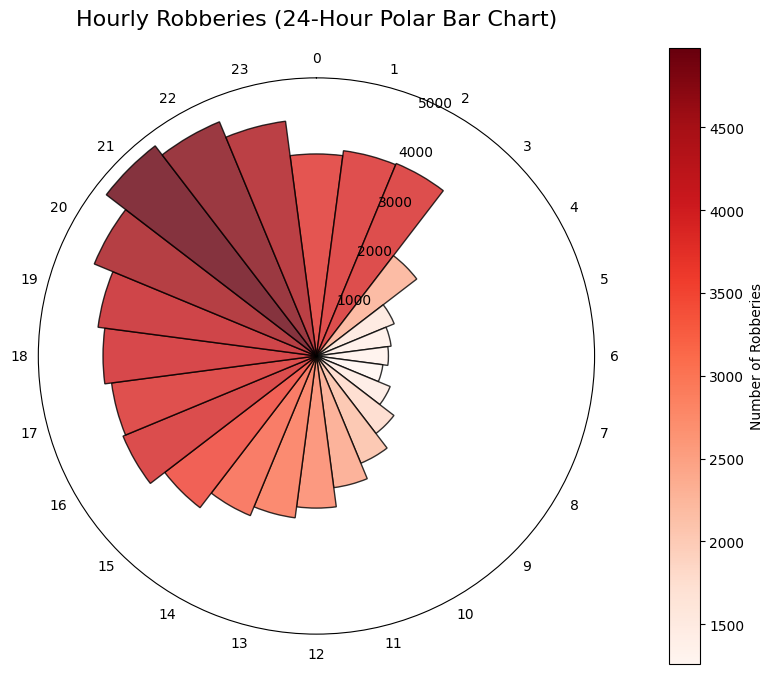

In [11]:

df_robbery = df[df['Category'] == 'ROBBERY'].copy()

# Convert Time column to datetime (assuming HH:MM format)
df_robbery['Time'] = pd.to_datetime(df_robbery['Time'], format='%H:%M', errors='coerce')

# Extract the hour
df_robbery['Hour'] = df_robbery['Time'].dt.hour

# Group by hour to get counts
hourly_counts = df_robbery.groupby('Hour').size()

# Ensure we have a value for each hour from 0..23 (fill missing with 0)
all_hours = np.arange(24)
hourly_counts = hourly_counts.reindex(all_hours, fill_value=0)

# Prepare polar coordinates
theta = 2 * np.pi * all_hours / 24.0  # even spacing of 24 hours around the circle
width = 2 * np.pi / 24.0

# Create a normalization and a colormap for the bar colors
norm = mpl.colors.Normalize(vmin=hourly_counts.min(), vmax=hourly_counts.max())
cmap = plt.cm.Reds  # choose any Matplotlib colormap you like
colors = cmap(norm(hourly_counts.values))

# Create the figure and polar subplot
fig = plt.figure(figsize=(8, 8))  # slightly larger for readability
ax = fig.add_subplot(111, polar=True)

# Plot the bars
bars = ax.bar(theta, hourly_counts, width=width, bottom=0,
              color=colors, edgecolor='black', alpha=0.8)

# Make the plot go clockwise, with 0 hours (midnight) at the top
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)

# Set up hour labels around the circle
ax.set_xticks(theta)
ax.set_xticklabels(all_hours)

# Remove radial grid lines if you want a cleaner background
ax.grid(False)

# Add a colorbar to interpret the color scale
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # required dummy array for colorbar
cbar = fig.colorbar(sm, ax=ax, pad=0.1, shrink=0.8)  # adjust pad & shrink for layout
cbar.set_label('Number of Robberies')

# Add a title
plt.title("Hourly Robberies (24-Hour Polar Bar Chart)", y=1.08, fontsize=16)

# Use tight_layout to improve spacing
plt.tight_layout()
plt.show()

# Analysis of Burglary Data in 2022

### Calendar Heatmap Observations

- **High Spike in April:**  
  A notable observation is that a Tuesday in April registered the highest daily count of burglaries (exceeding 40 incidents). This outlier stands out against most days that generally range between 10 and 30 incidents.

- **Irregular Patterns:**  
  Although there are sporadic spikes scattered throughout the year, no clear seasonal pattern emerges (e.g., summer isn’t consistently high and winter isn’t consistently low). Instead, clusters of higher activity appear to be tied to specific local events or other external factors.


### Polar bar chart Observations


# Part 4
## Excercise Part 1

**1) Figure 2.1 Style: Jitter Plot**

We decided to analyse the category 'VEHICLE THEFT' during the period 2004-01-01 and 2004-06-30

In [12]:
crime_type = "VEHICLE THEFT"
start_date = "2004-01-01"
end_date   = "2004-06-30"

mask_crime = df["Category"] == crime_type
mask_dates = (df["Date"] >= start_date) & (df["Date"] <= end_date)
filtered_df = df[mask_crime & mask_dates].copy()

In [13]:
def time_to_decimal_hours(time_str):
    """Convert 'HH:MM' -> float(HH + MM/60)."""
    try:
        hh, mm = time_str.split(":")
        return float(hh) + float(mm)/60
    except:
        return np.nan  # fallback for malformed times

filtered_df["DecimalHour"] = filtered_df["Time"].apply(time_to_decimal_hours)

# Keep records in the hour range 13:00–14:00
hour_mask = (filtered_df["DecimalHour"] >= 23.0) & (filtered_df["DecimalHour"] < 24.0)
subset_df = filtered_df[hour_mask].copy()
print(f"Number of {crime_type} records in [23.00-24:00]:", len(subset_df))

Number of VEHICLE THEFT records in [23.00-24:00]: 610


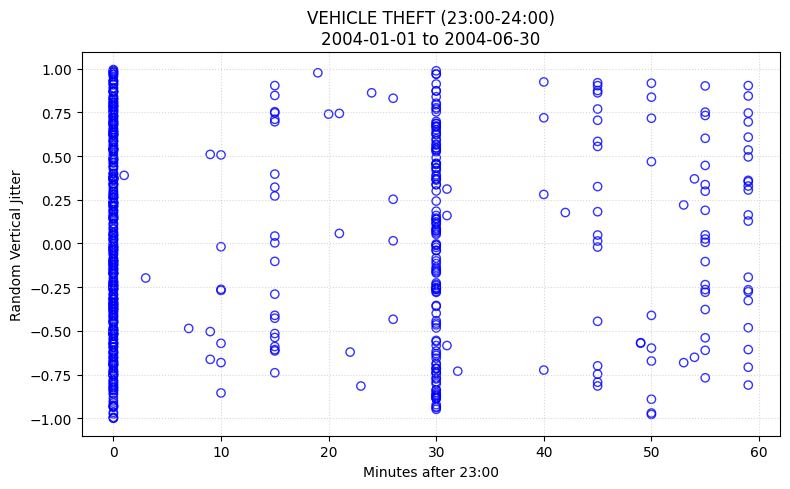

In [14]:
jitter_strength = 1.0 
subset_df["jitter"] = np.random.uniform(-jitter_strength, jitter_strength, size=len(subset_df))

# Convert decimal hour to "minutes after 13:00" for the x-axis
subset_df["MinutesAfter23"] = (subset_df["DecimalHour"] - 23.0) * 60

plt.figure(figsize=(8, 5))
plt.scatter(
    subset_df["MinutesAfter23"],
    subset_df["jitter"],
    marker='o',
    facecolors='none',   # hollow circles
    edgecolors='blue',
    alpha=0.8
)

plt.title(f"{crime_type} (23:00-24:00)\n{start_date} to {end_date}")
plt.xlabel("Minutes after 23:00")
plt.ylabel("Random Vertical Jitter")
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


### 1. Jitter Plot for VEHICLE THEFT (23:00–24:00)

- **Clustering at Round Minutes:**  
  - Notice large stacks of points at minute 0 and minute 30, suggesting that times are often recorded at half-hour intervals rather than precise seconds.

- **Data Quality Insight:**  
  - The coarse, “binned” nature of recorded times may hide finer temporal patterns (e.g., distinguishing between 23:07 and 23:10).  
  - This rounding could distort detailed time-based analysis.

**2) Figure 2.2 Style: Histograms**

We'll pick **two different crime types** with interesting geographical patterns, then pick a suitable time interval with 1,000–10,000 points each. We'll plot the distribution of **latitudes** in ~50 bins.


In [15]:
crime1 = "BURGLARY"
crime2 = "VEHICLE THEFT"

start_date = "2010-01-01"
end_date   = "2011-12-31"
mask_dates = (df["Date"] >= start_date) & (df["Date"] <= end_date)

df_c1 = df[(df["Category"] == crime1) & mask_dates].copy()
df_c2 = df[(df["Category"] == crime2) & mask_dates].copy()

print(f"{crime1} rows:", len(df_c1))
print(f"{crime2} rows:", len(df_c2))

# Clean out lat outliers (e.g. 90.0 placeholders)
df_c1 = df_c1[(df_c1["Y"] > 37) & (df_c1["Y"] < 38)]
df_c2 = df_c2[(df_c2["Y"] > 37) & (df_c2["Y"] < 38)]
print(f"{crime1} valid-lat rows:", len(df_c1))
print(f"{crime2} valid-lat rows:", len(df_c2))



BURGLARY rows: 9869
VEHICLE THEFT rows: 9079
BURGLARY valid-lat rows: 9869
VEHICLE THEFT valid-lat rows: 9079


**Create Histograms with ~50 Bin**

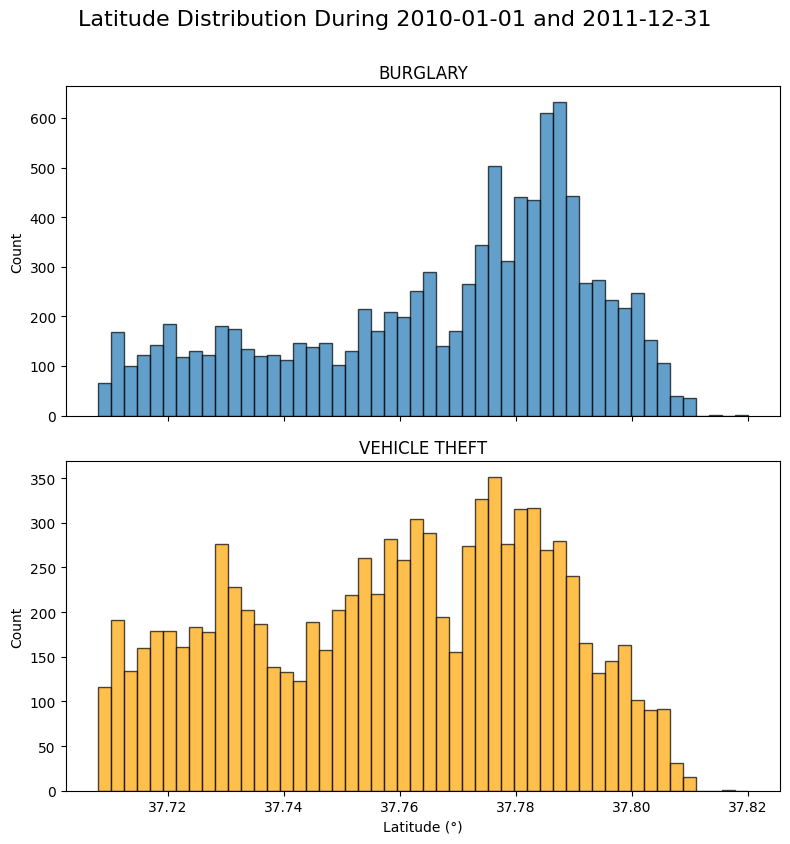

In [16]:
lat_min = min(df_c1["Y"].min(), df_c2["Y"].min())
lat_max = max(df_c1["Y"].max(), df_c2["Y"].max())

num_bins = 50
bins = np.linspace(lat_min, lat_max, num_bins+1)

# histogram counts
hist_c1, bin_edges = np.histogram(df_c1["Y"], bins=bins)
hist_c2, bin_edges = np.histogram(df_c2["Y"], bins=bins)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

bin_width = bin_edges[1] - bin_edges[0]
bin_centers = bin_edges[:-1] + bin_width/2

# Subplot 1
axes[0].bar(bin_centers, hist_c1, width=bin_width, edgecolor="k", alpha=0.7)
axes[0].set_title(f"{crime1} (Latitude Distribution) {start_date}/{end_date}")
axes[0].set_ylabel("Count")

# Subplot 2
axes[1].bar(bin_centers, hist_c2, width=bin_width, color="orange", edgecolor="k", alpha=0.7)
axes[1].set_title(f"{crime2} (Latitude Distribution) {start_date}/{end_date}")
axes[1].set_xlabel("Latitude (°)")
axes[1].set_ylabel("Count")

plt.tight_layout()
fig.suptitle(f"Latitude Distribution During {start_date} and {end_date}", fontsize=16, y=1.05)
axes[0].set_title(f"{crime1}", fontsize=12)
axes[1].set_title(f"{crime2}", fontsize=12)
plt.show()

### 2. Latitude Histograms (BURGLARY vs. VEHICLE THEFT)

- **Different Peaks:**  
  - **BURGLARY** incidents peak around latitudes ~37.79–38.00.  
  - **VEHICLE THEFT** shows a slightly wider spread, suggesting that certain neighborhoods (further north or south) experience distinct crime types more frequently.

- **Skew vs. Spread:**  
  - **BURGLARY** has a prominent peak in the upper-latitude range.  
  - **VEHICLE THEFT** is more evenly distributed.

- **Possible Influences:**  
  - The differences could stem from variations in population density or neighborhood characteristics.  
  - Note that plotting latitudes alone doesn’t capture east–west variations.

**3) Figure 2.4 Style: Histogram + KDE**

We’ll use the **same data** we used for Figure 2.1 (the one-hour subset) to create a histogram + KDE. Then we’ll repeat with **only 25 random points** from that subset to illustrate how KDE can be misleading with small samples. Let's do the combined histogram + KDE for the one-hour "subset_df" from earlier That had "DecimalHour" and "MinutesAfter23". We'll treat "MinutesAfter23" as our variable.


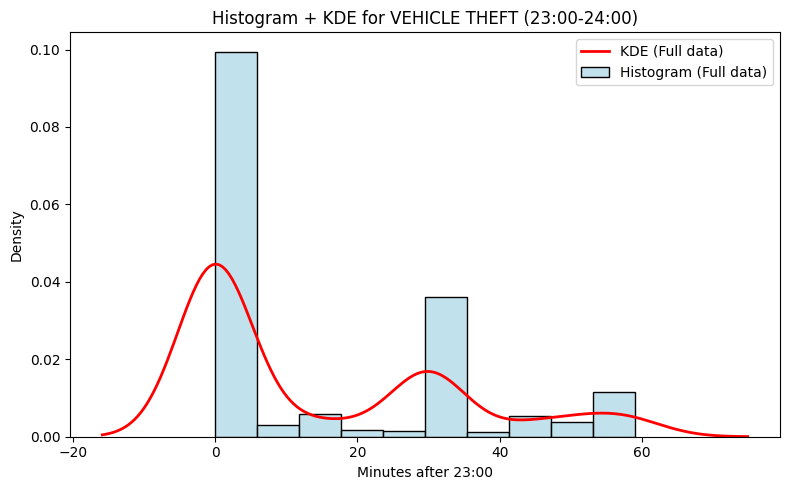

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

# Histogram
sns.histplot(
    data=subset_df,
    x="MinutesAfter23",
    kde=False,      # we'll add KDE separately
    bins=10,
    color="lightblue",
    edgecolor="black",
    stat="density",  # so histogram + kde share same scale
    ax=ax,
    label="Histogram (Full data)"
)

# Add a KDE line
sns.kdeplot(
    data=subset_df,
    x="MinutesAfter23",
    color="red",
    linewidth=2,
    fill=False,
    label="KDE (Full data)",
    ax=ax
)

ax.set_title(f"Histogram + KDE for {crime_type} (23:00-24:00)")
ax.set_xlabel("Minutes after 23:00")
ax.set_ylabel("Density")
ax.legend()
plt.tight_layout()
plt.show()

**Now Sample Only 25 Points**

We’ll see how the KDE changes drastically with very few data points.


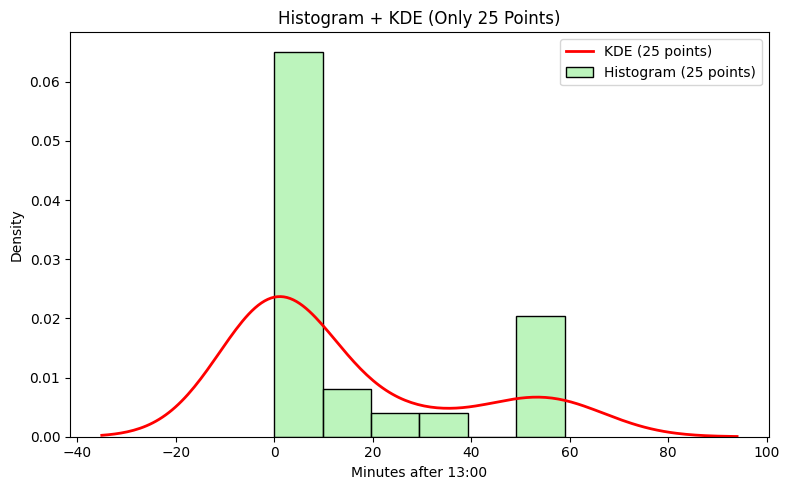

In [18]:
small_sample = subset_df.sample(n=25, random_state=42)

fig, ax = plt.subplots(figsize=(8,5))

# HISTOGRAM of 25 points
sns.histplot(
    data=small_sample,
    x="MinutesAfter23",
    bins=6,  # fewer bins for fewer points
    stat="density",
    color="lightgreen",
    edgecolor="black",
    alpha=0.6,
    label="Histogram (25 points)",
    ax=ax
)

# KDE of 25 points
sns.kdeplot(
    data=small_sample,
    x="MinutesAfter23",
    color="red",
    linewidth=2,
    fill=False,
    label="KDE (25 points)",
    ax=ax
)

ax.set_title("Histogram + KDE (Only 25 Points)")
ax.set_xlabel("Minutes after 13:00")
ax.set_ylabel("Density")
ax.legend()
plt.tight_layout()
plt.show()

### 3. Histogram + KDE for VEHICLE THEFT (23:00–24:00)

- **Large Spike at 0 Minutes:**  
  - The histogram shows a dominant bar at minute 0, with a secondary spike at approximately minute 30.

- **KDE’s Smooth Shape:**  
  - The red KDE curve creates a continuous distribution, introducing “bumps” where the data is densest.  
  - However, it may be misleading if the true data consists of discrete clumps (as seen with the binned times).

- **Why KDE Can Mislead:**  
  - With times binned at 0 and 30 minutes, the KDE oversmooths these discrete spikes, suggesting a broad peak.  
  - While useful for visualizing general trends, it may blur important details, such as the significant lumps at specific minutes.

- **25 points Misleading**
  - Taking 25 random points from the dataset, can be very misleading (see minute 30)


# Part 4 Exercise 2

**2. Figure 2-11 Style: Probability Plots**

Recall from Part 1 that we created **histograms** of two crime types (e.g. "BURGLARY" vs. "VEHICLE THEFT") focusing on latitudes. We'll do *probability plots* for those same subsets.

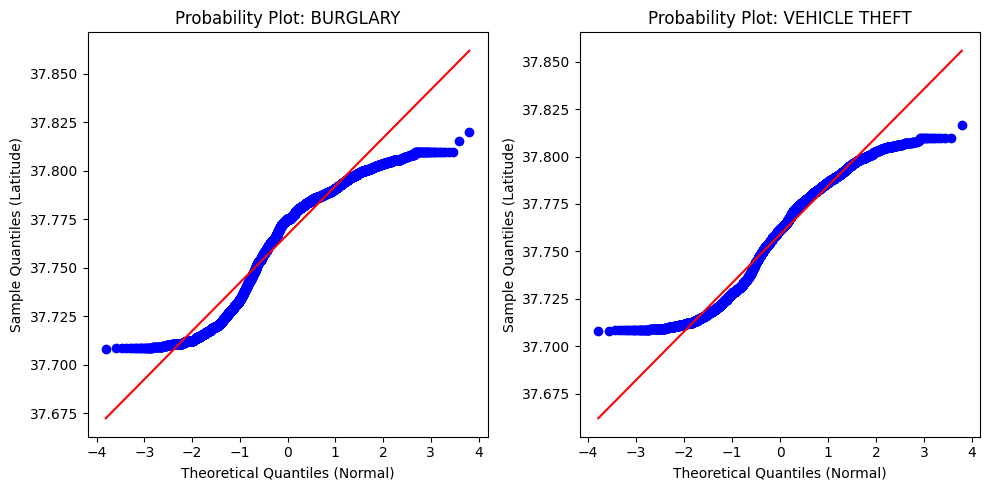

In [19]:
# Probability Plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=False)

stats.probplot(df_c1["Y"].dropna(), dist="norm", plot=axes[0])
axes[0].set_title(f"Probability Plot: {crime1}")
axes[0].set_xlabel("Theoretical Quantiles (Normal)")
axes[0].set_ylabel("Sample Quantiles (Latitude)")

stats.probplot(df_c2["Y"].dropna(), dist="norm", plot=axes[1])
axes[1].set_title(f"Probability Plot: {crime2}")
axes[1].set_xlabel("Theoretical Quantiles (Normal)")
axes[1].set_ylabel("Sample Quantiles (Latitude)")

plt.tight_layout()
plt.show()

### Crime Data Analysis: Probability and Box Plots

### Non‐Normal Shape
- Both distributions deviate substantially from the red diagonal line, indicating that the latitudes for **BURGLARY** and **VEHICLE THEFT** are not normally distributed.
- This is expected because San Francisco's latitudes are bounded (roughly **37.70–37.82**).

### Similar Latitude Ranges
- The overlapping curves show that both crimes are concentrated in a similar north–south band of the city.
- There is, however, a slight difference in the “peak” latitudes between the two crime types.

### Curvature in Tails
- The plots exhibit an **“S‐shaped” bend**:
  - More points lie in the mid-latitude range than a Gaussian distribution would predict.
  - The extremes (lowest or highest latitudes) occur less (or more) frequently than expected under a normal distribution


**Daily Crime Counts: Box Plots for 10 Focus Crimes**

1. Group by `(Crime_Category, Crime_Date)` → count incidents per day.  
2. Create box-and-whisker plots side-by-side to compare *daily fluctuations* in each category.


C:\Users\Leuro\AppData\Local\Temp\ipykernel_25064\2050963205.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


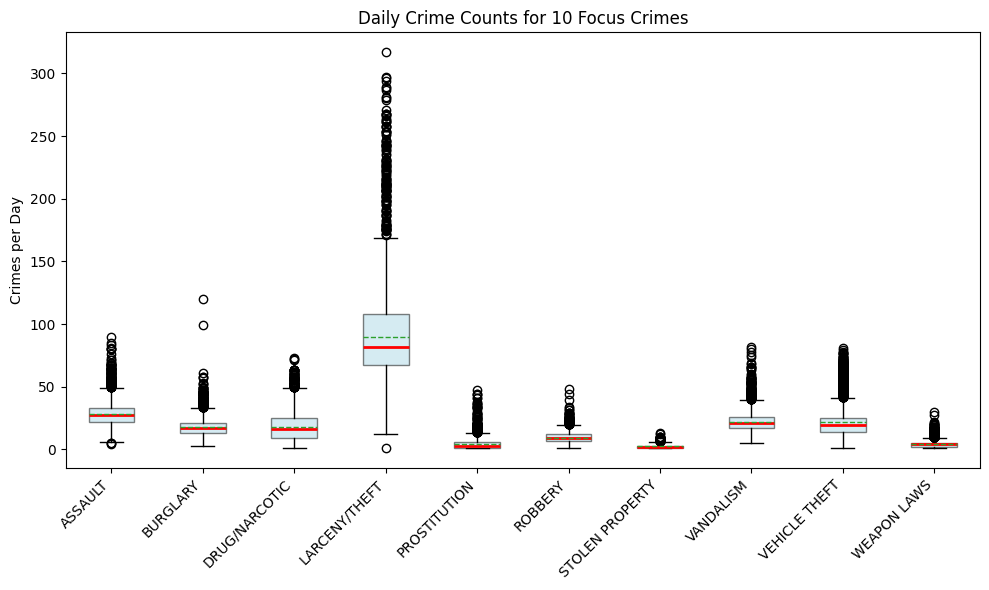

In [20]:
df_focus = df[df["Category"].isin(focuscrimes)].copy()
df_focus.dropna(subset=["Date"], inplace=True)

# Group by (crime, date)
daily_counts = (
    df_focus
    .groupby(["Category", "Date"])
    .size()
    .reset_index(name="count")
)

# Convert to a structure suitable for boxplot
crime_groups = daily_counts.groupby("Category")["count"].apply(list)

# Sort categories in alphabetical or by median
ordered_categories = sorted(crime_groups.index)

data_for_boxplot = [crime_groups[cat] for cat in ordered_categories]

plt.figure(figsize=(10, 6))
box = plt.boxplot(
    data_for_boxplot,
    labels=ordered_categories,
    showmeans=True,
    meanline=True,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", alpha=0.5),
    medianprops=dict(color="red", linewidth=2),
)

plt.title("Daily Crime Counts for 10 Focus Crimes")
plt.ylabel("Crimes per Day")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Sorting by Median**

C:\Users\Leuro\AppData\Local\Temp\ipykernel_25064\3372618865.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


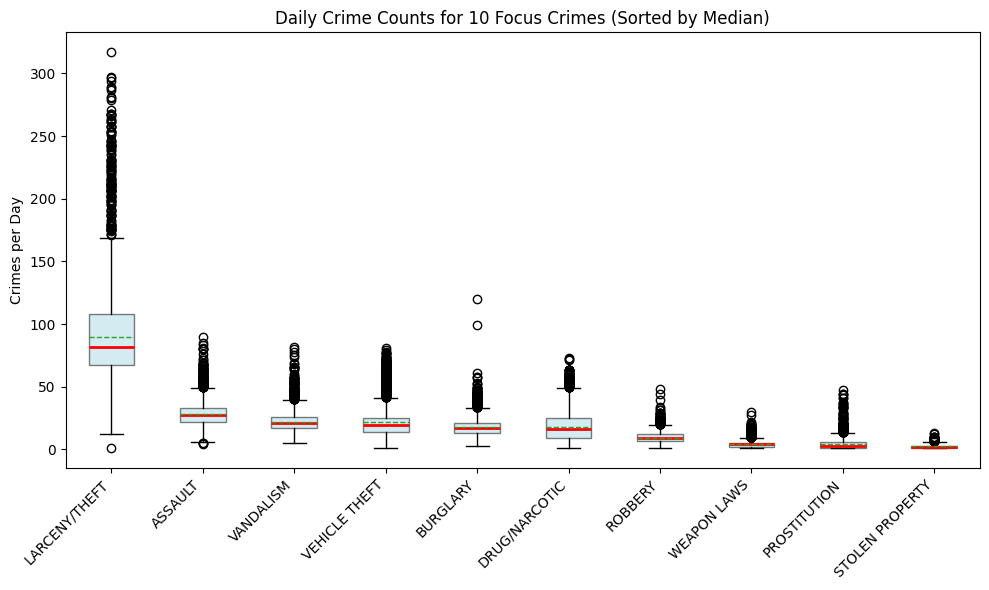

In [21]:
medians = daily_counts.groupby("Category")["count"].median()
sorted_categories = medians.sort_values(ascending=False).index

# Rebuild data_for_boxplot in sorted order
sorted_data = [crime_groups[cat] for cat in sorted_categories]

plt.figure(figsize=(10, 6))
plt.boxplot(
    sorted_data,
    labels=sorted_categories,
    showmeans=True,
    meanline=True,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", alpha=0.5),
    medianprops=dict(color="red", linewidth=2),
)

plt.title("Daily Crime Counts for 10 Focus Crimes (Sorted by Median)")
plt.ylabel("Crimes per Day")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 2. Daily Crime Counts Box Plot (Sorted by Median)

**Largest Overall Volume**
- **LARCENY/THEFT** dominates the daily counts, characterized by:
  - A high median.
  - Numerous extreme outliers (days with 200+ incidents).

**Moderate/High Categories**
- **ASSAULT**, **VANDALISM**, and **VEHICLE THEFT** form a second tier:
  - They have lower median daily counts compared to LARCENY/THEFT.
  - They still show many outliers.

**Lower-Frequency Crimes**
- **BURGLARY**, **DRUG/NARCOTIC**, **ROBBERY**, **WEAPON LAWS**, **PROSTITUTION**, and **STOLEN PROPERTY**:
  - These crimes have smaller daily counts, with occasional spikes.

**Value of Sorting**
- Sorting by median makes it clear that **LARCENY/THEFT** outpaces other crimes.
- It also highlights that crimes like **PROSTITUTION** typically occur in much lower numbers per day.


**4. Time-of-Day Box Plots**

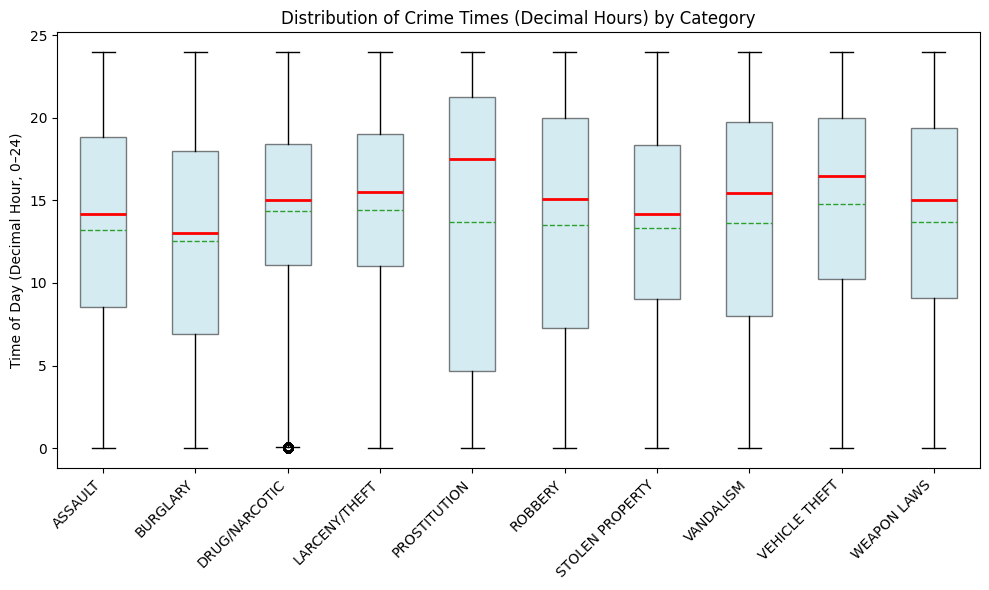

In [22]:
def time_to_decimal_hour(t_str):
    """
    Convert 'HH:MM' or 'HH:MM:SS' -> decimal hours.
    e.g. '10:15' -> 10.25, '8:40' -> 8.67
    """
    parts = t_str.split(":")
    if len(parts) < 2:
        return np.nan
    hh = int(parts[0])
    mm = int(parts[1])
    ss = int(parts[2]) if len(parts) == 3 else 0
    return hh + mm/60 + ss/3600

df_focus["DecimalHour"] = df_focus["Time"].apply(time_to_decimal_hour)
df_focus.dropna(subset=["DecimalHour"], inplace=True)

# Group times by crime category
grouped_times = df_focus.groupby("Category")["DecimalHour"].apply(list)

# Sort categories (alphabetical or by median time)
ordered_cats = sorted(grouped_times.index)
hour_data = [grouped_times[cat] for cat in ordered_cats]
plt.figure(figsize=(10, 6))
plt.boxplot(
    hour_data,
    tick_labels=ordered_cats,
    showfliers=True,
    showmeans=True,
    meanline=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.5),
    medianprops=dict(color='red', linewidth=2)
)
plt.title("Distribution of Crime Times (Decimal Hours) by Category")
plt.ylabel("Time of Day (Decimal Hour, 0–24)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 3. Time-of-Day Box Plot

**Late‐Night vs. Daytime Patterns**
- **PROSTITUTION**:
  - Tend to occur later in the evening
- **BURGLARY**:
  - Display broader spreads or tendencies towards midday occurrences.

**Varied Dispersion**
- **PROSTITUTION**:
  - The tall box plot with whiskers extending from near 0:00 to ~24:00 suggests incidents occur throughout the day.
- **DRUG/NARCOTIC**:
  - Clusters more within the 11:00–19:00 time window, indicating a narrower time span.

**Insights from Time-of-Day Analysis**
- Although a daily counts box plot cannot show when offenses occur during the day, the time-of-day box plot reveals each category’s characteristic temporal pattern.
- This information is valuable for scheduling patrols or analyzing shifts in criminal activity over a 24-hour period.

# PART 5

1. **Filter** SF crime data to the "PROSTITUTION" category.
2. **Choose** a time resolution 3-years for monthly bins  and at least 36 frames.
3. **Use** Folium's `HeatMapWithTime` to create a time-lapse "movie" showing hotspots shifting over time.

In [23]:
# Define the crime of interest and filter for prostitution records
crime_of_interest = "PROSTITUTION"
df_pros = df[df["Category"] == crime_of_interest].copy()
print("Total prostitution records:", len(df_pros))

# Convert coordinate columns to float (assuming Y = latitude, X = longitude)
df_pros['Y'] = df_pros['Y'].astype(float)
df_pros['X'] = df_pros['X'].astype(float)

# Convert 'Year' to integers
df_pros['Year'] = df_pros['Year'].astype(int)

# Map month names to integers
month_mapping = {month: index for index, month in enumerate(calendar.month_name) if month}
df_pros['Month'] = df_pros['Month'].map(month_mapping)

# Filter the DataFrame for records between 2017 and 2020 (inclusive)
df_period = df_pros[(df_pros['Year'] >= 2017) & (df_pros['Month'].notnull()) & (df_pros['Year'] <= 2020)]
print("Total records for 2017-2020:", len(df_period))

# --- Step 2: Prepare the HeatMap Data for Each Month ---
heat_data = []
time_index = []

# Loop through each year and each month within the period
for year in range(2017, 2021):  # 2021 is excluded; thus, 2017, 2018, 2019, 2020
    for month in range(1, 13):
        # Filter records for the given year and month
        df_month = df_period[(df_period['Year'] == year) & (df_period['Month'] == month)]
        # Create a list of [latitude, longitude] pairs for this month
        month_points = df_month.apply(lambda row: [row['Y'], row['X']], axis=1).tolist()
        heat_data.append(month_points)
        # Create a label for the time slider (e.g., "January 2017")
        time_index.append(f"{calendar.month_name[month]} {year}")

# --- Step 3: Create the Map and Add the HeatMapWithTime Layer ---
# Center the map at the mean location of the filtered records
if not df_period.empty:
    map_center = [df_period['Y'].mean(), df_period['X'].mean()]
else:
    map_center = [0, 0]  # Fallback center if no data is available

m = folium.Map(location=map_center, zoom_start=13)

# Create and add the HeatMapWithTime layer for the specified period
heatmap = plugins.HeatMapWithTime(
    data=heat_data,
    index=time_index,
    auto_play=True,
    max_opacity=0.8,
    radius=15,
    blur=0.8,
    min_opacity=0,
    display_index=True,
    index_steps=1
)
heatmap.add_to(m)

m


Total prostitution records: 17436
Total records for 2017-2020: 1262


**Temporal Patterns**  
- We’ve chosen **monthly resolution** from 2017–2020, generating 48 frames. 
- This is enough to reveal seasonal or year-to-year shifts in prostitution hotspots.

**What does the heatmap reveal?**  
- Certain areas like Mission District remain consistently hot across months

**Data Errors**  
- GPS Rounding: Some points might be placeholders (e.g., lat=90.0). We dropped rows with NaN or invalid coordinates. 
- Time Rounding: The original data might only record day or month, preventing finer analysis. 
- Underreporting or Policy Changes: A big shift in the data might reflect changed enforcement or reporting rather than actual crime disappearance.  

### Temporal pattern on Prostitution
1. Polar bar with season
2. daily calendar plot highlights single-day extremes or rhythms over years
3. hour-vs.-month heatmap focuses on intra-day vs. seasonal differences

**Polar bar to highlight different season**

In [24]:
df = pd.read_csv("merged_data.csv")

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Month"] = df["Month"].map({m: i for i, m in enumerate(calendar.month_name) if m})
df["Y"] = pd.to_numeric(df["Y"], errors="coerce")
df["X"] = pd.to_numeric(df["X"], errors="coerce")

df_pros = df[
    (df["Category"] == "PROSTITUTION") &
    (df["Year"].between(2017, 2020))
].copy()

# Drop invalid rows
df_pros.dropna(subset=["Month", "Y", "X"], inplace=True)

# Define a helper to map month->season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"
season_colors = {
    "Winter": (0.2, 0.4, 1.0),     # bluish
    "Spring": (0.0, 0.7, 0.0),     # greenish
    "Summer": (1.0, 0.5, 0.0),     # orange
    "Fall":   (0.8, 0.4, 0.0),     # darker orange/brown
}
df_pros["Season"] = df_pros["Month"].apply(get_season)

season_counts = df_pros.groupby("Season").size().reindex(
    ["Winter", "Spring", "Summer", "Fall"], fill_value=0
)

monthly_counts = df_pros.groupby("Month").size().reindex(range(1,13), fill_value=0)


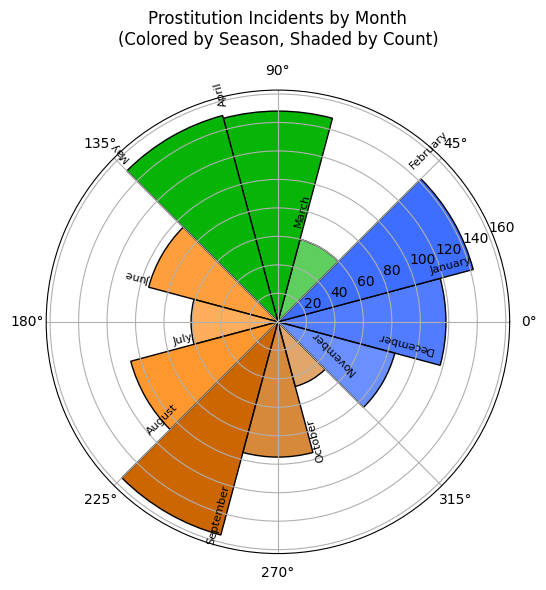

In [25]:
month_names = [calendar.month_name[m] for m in range(1, 13)]
r = monthly_counts.values  # the height of each bar

theta = np.linspace(0.0, 2 * np.pi, 12, endpoint=False)
width = 2 * np.pi / 12
max_val = r.max()

def get_bar_color(month, count):
    """Return an RGBA tuple for the bar, 
    tinted based on how large 'count' is."""
    fraction = count / max_val  # 0..1
    base_col = season_colors[get_season(month)]
    # Keep the same base RGB, vary alpha
    alpha = 0.4 + 0.6 * fraction  # from 0.4..1.0 
    return (base_col[0], base_col[1], base_col[2], alpha)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)

# For each month, we define the angle, radius, and color
for i in range(12):
    month = i+1  # 1..12
    angle = theta[i]
    count = r[i]
    bar_color = get_bar_color(month, count)

    ax.bar(
        angle,
        count,
        width=width,
        bottom=0,
        color=bar_color,
        edgecolor='k'
    )

# Optionally label each bar
for i in range(12):
    # Place text slightly above the bar
    angle_deg = np.degrees(theta[i]) + width*180/np.pi/2
    if angle_deg > 180:
        angle_deg -= 180
    ax.text(
        theta[i] + width/2, 
        r[i] + (0.05 * r.max()), 
        month_names[i], 
        rotation=angle_deg,
        ha='center', va='bottom', 
        fontsize=8
    )

ax.set_title("Prostitution Incidents by Month\n(Colored by Season, Shaded by Count)", y=1.08)
plt.tight_layout()
plt.show()


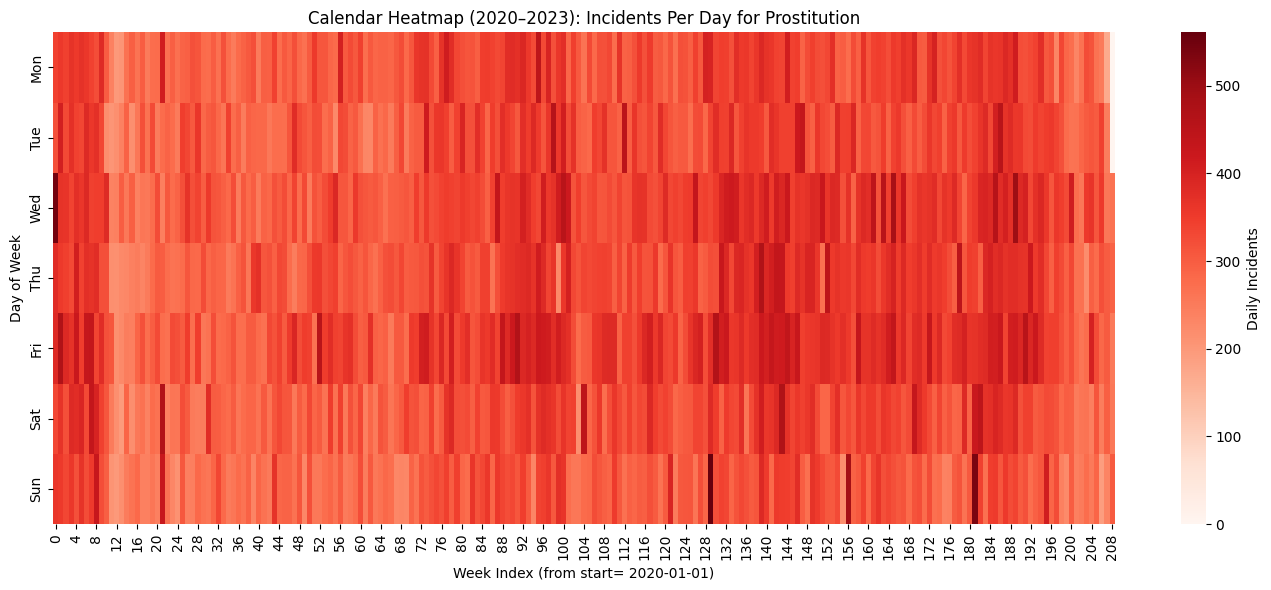

In [26]:
# Load your data
# Convert to datetime if not already
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Filter to the 2020–2023 date range
mask = (df["Date"] >= "2020-01-01") & (df["Date"] < "2024-01-01")
df_2020_23 = df[mask].copy()

# Example: If focusing on a single category:
# df_2020_23 = df_2020_23[df_2020_23["Category"] == "PROSTITUTION"].copy()

# Drop rows with missing dates or times if necessary
df_2020_23.dropna(subset=["Date", "Time"], inplace=True)
daily_counts = (
    df_2020_23
    .groupby(df_2020_23["Date"].dt.date)  # group by year-month-day
    .size()
    .rename("count")
    .reset_index()
)

daily_counts.columns = ["Date", "count"]

# Create a full date range from min to max in daily_counts
start = daily_counts["Date"].min()
end   = daily_counts["Date"].max()

# Create a continuous daily range
all_dates = pd.date_range(start, end, freq="D")

# Ensure 'Date' column in daily_counts is of datetime type
daily_counts["Date"] = pd.to_datetime(daily_counts["Date"])

# Re-index daily_counts to ensure every day is present
calendar_df = pd.DataFrame({"Date": all_dates}).merge(daily_counts, on="Date", how="left")
calendar_df["count"] = calendar_df["count"].fillna(0)

# Create columns for day-of-week and week-of-year, 
# but we have multiple years, so let's define a "week index" from start
calendar_df["day_of_week"] = calendar_df["Date"].dt.weekday  # Monday=0..Sunday=6
# Convert start to datetime
start_datetime = pd.to_datetime(start)
# We'll define a naive "week index" from the start date
calendar_df["week_index"] = ((calendar_df["Date"] - start_datetime).dt.days // 7)

# Rows = week_index, cols = day_of_week
cal_pivot = calendar_df.pivot(index="week_index", columns="day_of_week", values="count")
cal_pivot = cal_pivot.fillna(0)


plt.figure(figsize=(14, 6))

# day_of_week=0 is Monday, so let's rename columns from 0..6
days_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
cal_pivot.columns = days_labels

sns.heatmap(
    cal_pivot.transpose(),  # so days go on the y-axis, weeks on the x-axis
    cmap="Reds",            # or "YlGnBu", "viridis", etc.
    cbar_kws={"label": "Daily Incidents"}
)
plt.title("Calendar Heatmap (2020–2023): Incidents Per Day for Prostitution")
plt.xlabel("Week Index (from start= {})".format(start))
plt.ylabel("Day of Week")

plt.tight_layout()
plt.show()


**hour-vs.-month heatmap focuses on intra-day vs. seasonal differences**

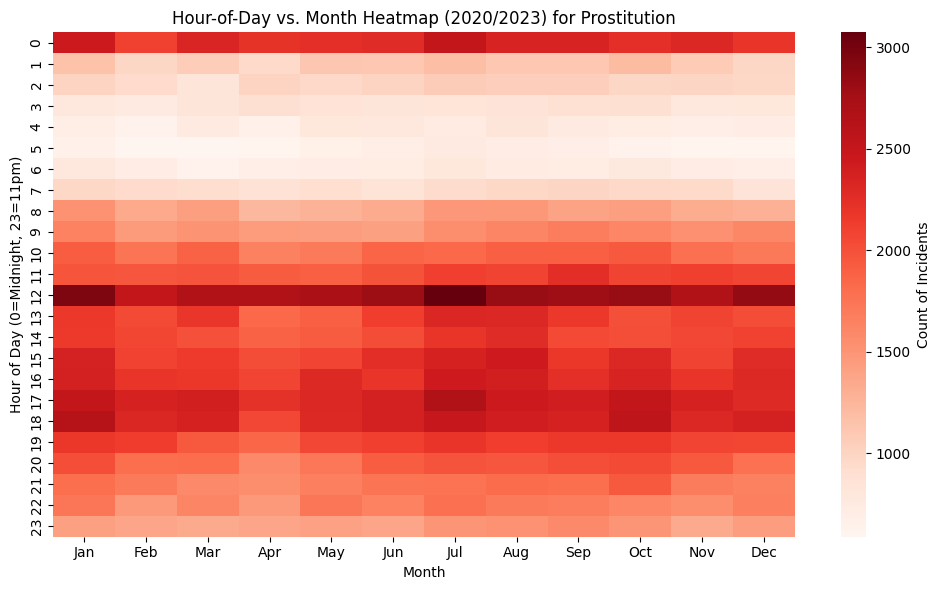

In [27]:
def get_hour(t_str):
    # If 'Time' might be HH:MM or HH:MM:SS
    parts = t_str.split(":")
    hh = int(parts[0]) if len(parts) > 0 else np.nan
    return hh

df_2020_23["Hour"] = df_2020_23["Time"].apply(get_hour)
df_2020_23["MonthNum"] = df_2020_23["Date"].dt.month

# Now group by (MonthNum, Hour)
month_hour_counts = (
    df_2020_23
    .groupby(["MonthNum","Hour"])
    .size()
    .rename("count")
    .reset_index()
)

pivot_2d = month_hour_counts.pivot(index="Hour", columns="MonthNum", values="count")
pivot_2d = pivot_2d.fillna(0)

plt.figure(figsize=(10,6))

month_labels = [calendar.month_abbr[m] for m in range(1,13)]
pivot_2d.columns = month_labels  # rename columns from 1..12 to 'Jan'..'Dec'

sns.heatmap(
    pivot_2d, 
    cmap="Reds",
    cbar_kws={"label":"Count of Incidents"}
)

plt.title("Hour-of-Day vs. Month Heatmap (2020/2023) for Prostitution")
plt.xlabel("Month")
plt.ylabel("Hour of Day (0=Midnight, 23=11pm)")

plt.tight_layout()
plt.show()
